In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load Modules, Functions, Objects
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load the Dataset into a DataFrame
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
df = pd.read_csv("iris.csv", names = col_names)

In [5]:
# Summarize the Dataset
print(df.shape)

(150, 5)


In [6]:
print(df.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
print(df.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
print(df['Class'].value_counts())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


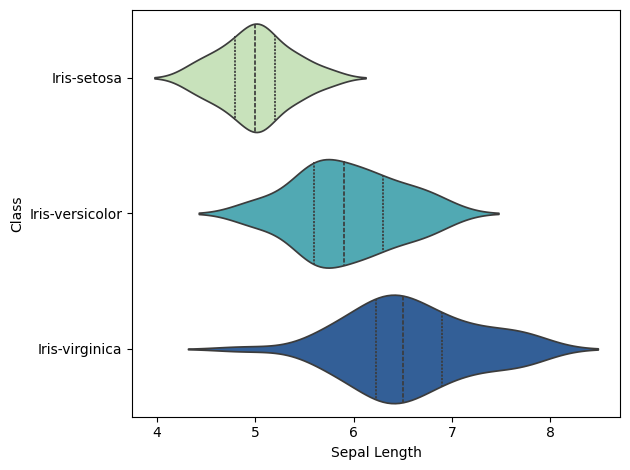

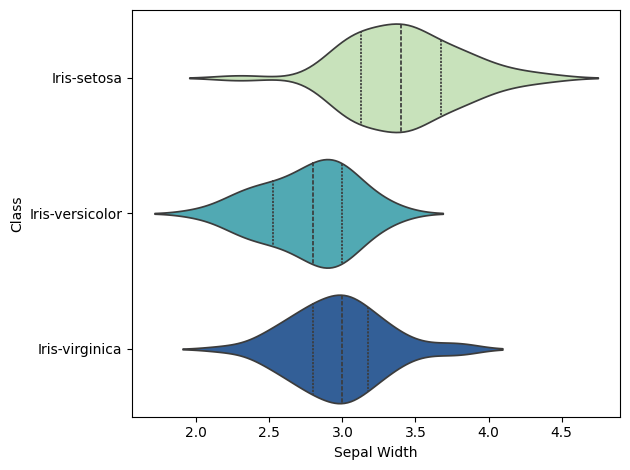

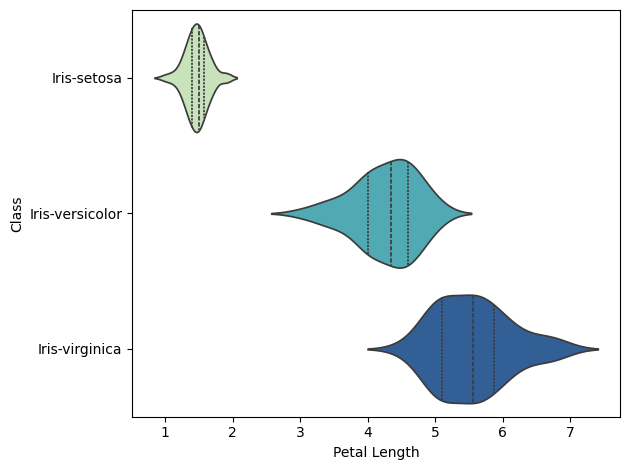

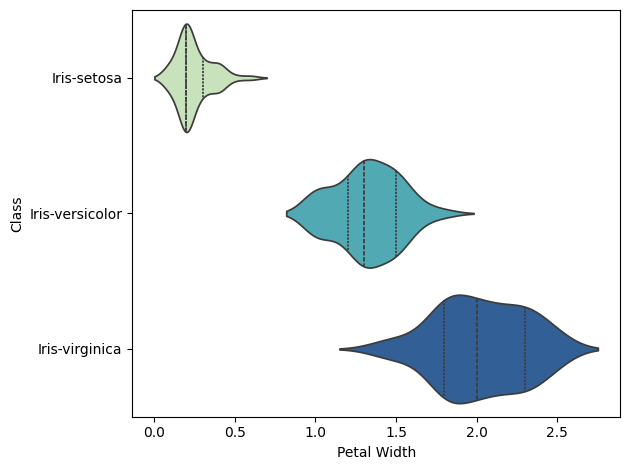

In [10]:
# Create Violin Plots to Compare Variable Distribution
sns.violinplot(y='Class', x='Sepal Length', data=df, inner='quartile', hue='Class', palette="YlGnBu")
# Adjust the plot to ensure all labels are visible
plt.tight_layout()
plt.show()
sns.violinplot(y='Class', x='Sepal Width', data=df, inner='quartile', hue='Class', palette="YlGnBu")
plt.tight_layout()
plt.show()
sns.violinplot(y='Class',x='Petal Length',data=df,inner='quartile',hue='Class', palette="YlGnBu")
plt.tight_layout()
plt.show()
sns.violinplot(y='Class',x='Petal Width',data=df,inner='quartile',hue='Class', palette="YlGnBu")
plt.tight_layout()
plt.show()

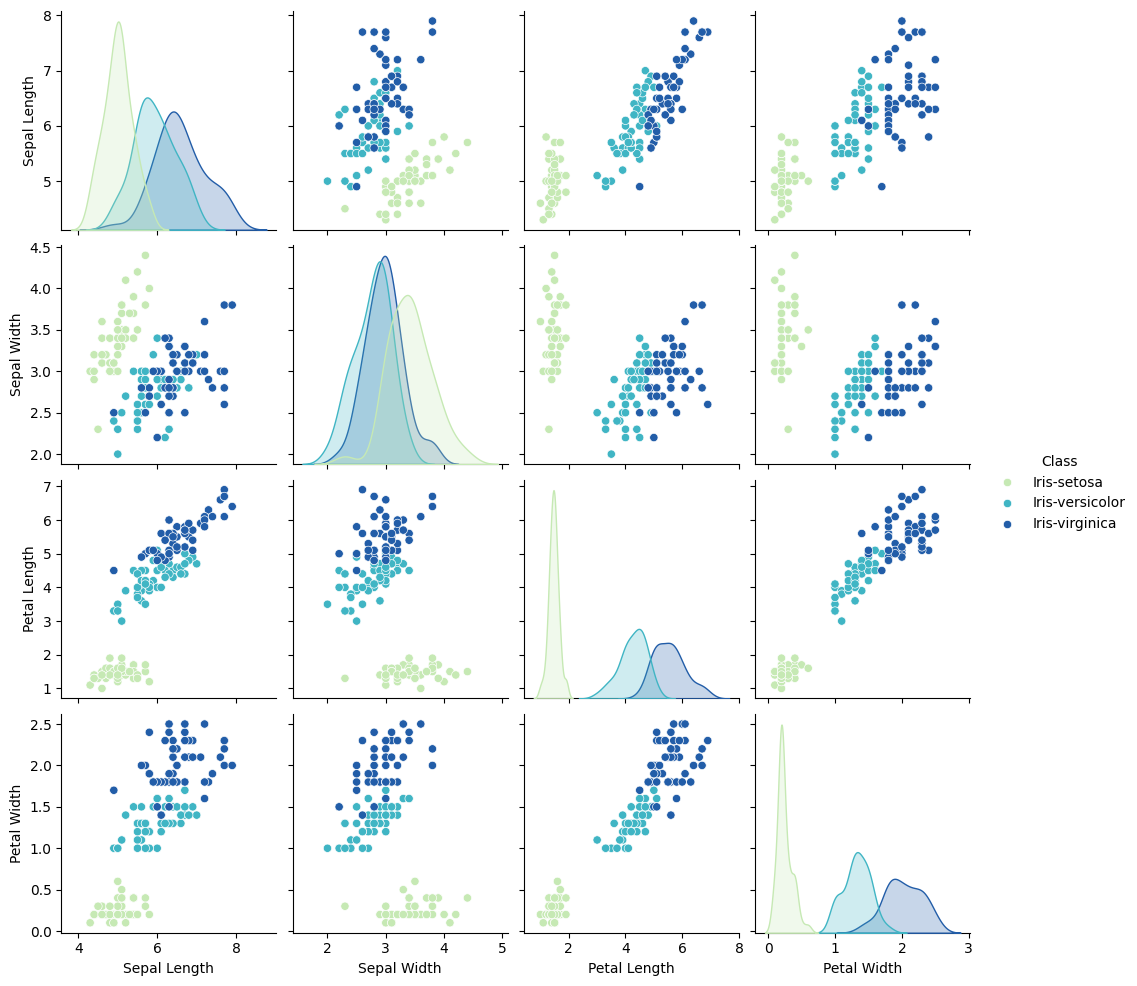

In [11]:
# Create Pairs Plot to Check Multiple Pairwise Bivariate Distributions
sns.pairplot(df, hue='Class', palette="YlGnBu")
plt.show()

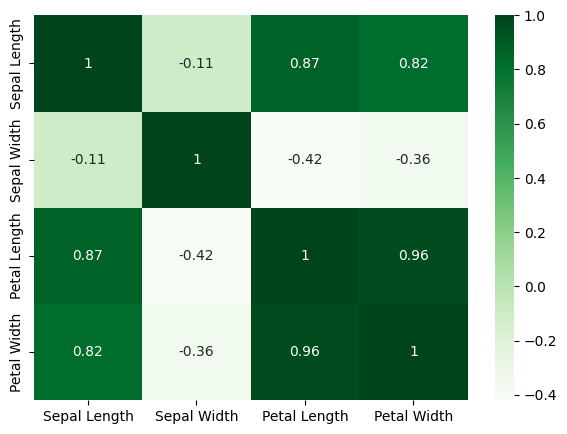

In [12]:
# Plot Heatmap to Check Pairwise Correlation
plt.figure(figsize=(7,5))
#Select only numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='Greens')
plt.show()

In [13]:
# Model Building
x = df.drop(['Class'], axis=1)
y = df['Class']
print(f'x shape: {x.shape} | y shape: {y.shape}')

x shape: (150, 4) | y shape: (150,)


In [14]:
# Split the Dataset into Train and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [15]:
# Test Six Different Algorithms in Loop and Print Accuracy
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))
# Evaluate Each Model
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
DT: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVC: 0.983333 (0.033333)
RF: 0.950000 (0.040825)


In [16]:
# Train the SVC Model and Make Predictions on the Test Dataset
svcmodel = SVC(gamma='auto')
svcmodel.fit(x_train, y_train)
predictions = svcmodel.predict(x_test)

In [17]:
# Evaluate Predictions
print(accuracy_score(y_test, predictions))

0.9666666666666667


In [18]:
print(confusion_matrix(y_test, predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


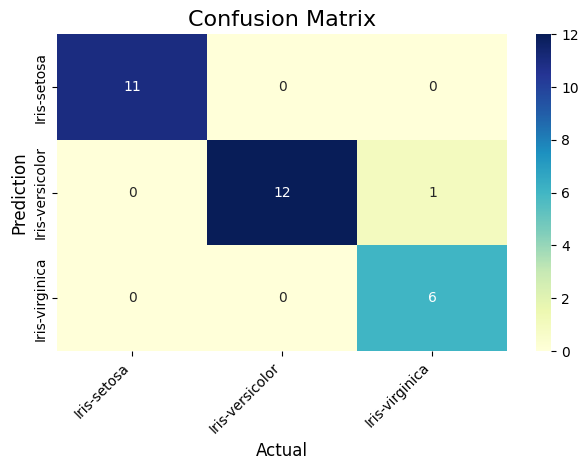

In [19]:
# Plot the Confusion Matrix in a Heatmap
cm = confusion_matrix(y_test, predictions)
# Get Unique ‘Class’ Labels
class_labels = df['Class'].unique()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)
# Rotate x-axis Labels by 45 Degrees for Better Readability
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
# Adjust the Plot to Ensure All Labels are Visible
plt.tight_layout()
plt.show()

In [20]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [22]:
import os
import pickle
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the app directory
app_dir = 'app/models'

# Create the directory if it doesn't exist
os.makedirs(app_dir, exist_ok=True)

# Train and save each model
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    model.fit(x_train, y_train)  # Train the model on the full training set

    # Save the model to the app directory
    model_path = os.path.join(app_dir, f'{name}_model.pkl')
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std Dev = {cv_results.std():.4f}')
    print(f'Model saved at: {model_path}')


LDA: Mean Accuracy = 0.9750, Std Dev = 0.0382
Model saved at: app/models\LDA_model.pkl
KNN: Mean Accuracy = 0.9583, Std Dev = 0.0417
Model saved at: app/models\KNN_model.pkl
DT: Mean Accuracy = 0.9417, Std Dev = 0.0382
Model saved at: app/models\DT_model.pkl
NB: Mean Accuracy = 0.9500, Std Dev = 0.0553
Model saved at: app/models\NB_model.pkl
SVC: Mean Accuracy = 0.9833, Std Dev = 0.0333
Model saved at: app/models\SVC_model.pkl
RF: Mean Accuracy = 0.9417, Std Dev = 0.0534
Model saved at: app/models\RF_model.pkl
